## Observations and Insights 

In [609]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df1 = mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
df1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [384]:
# Checking the number of mice.
number_of_mice = df1.nunique()["Mouse ID"]
number_of_mice

249

In [401]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df1.loc[df1.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
df1.loc[df1['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [402]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df1.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], inplace = True)
df = df1
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [403]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = df.nunique()["Mouse ID"]
number_of_mice

249

In [404]:
#WATCH END OF 1/26 LECTURE FOR HW INSIGHTS

## Summary Statistics

In [405]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summ = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drugs = df['Drug Regimen'].unique()
tumormean = list(summ)
tumormedian = list(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median())
tumorvar = list(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(ddof=0))
tumorstd = list(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(ddof=0))
tumorSEM = list(df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(ddof=0))
data = list(zip(drugs,tumormean,tumormedian,tumorvar,tumorstd,tumorSEM))
summary1 = pd.DataFrame(data, columns = ['Drug Regimen','Mean of Tutor Volume Per Drug','Median of Tutor Volume Per Drug', 'Variance of Tutor Volume Per Drug','Standard Deviation of Tutor Volume Per Drug','SEM of Tutor Volume Per Drug'])
summary1

,Drug Regimen,Mean of Tutor Volume Per Drug,Median of Tutor Volume Per Drug,Variance of Tutor Volume Per Drug,Standard Deviation of Tutor Volume Per Drug,SEM of Tutor Volume Per Drug
0,Ramicane,40.675741,41.557809,24.839296,4.983904,0.328629
1,Capomulin,52.591172,51.776157,39.069446,6.250556,0.468499
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
3,Placebo,55.235638,53.698743,68.188930,8.257659,0.602252
4,Ceftamin,54.331565,52.509285,65.817708,8.112811,0.594860
5,Stelasyn,54.033581,52.288934,60.830138,7.799368,0.579722
6,Zoniferol,52.393463,50.909965,42.862273,6.546928,0.524174
7,Ketapril,40.216745,40.673236,23.383692,4.835669,0.320250
8,Propriva,54.233149,52.431737,59.122106,7.689090,0.571526
9,Naftisol,53.236507,51.818479,48.266689,6.947423,0.514977


In [406]:
# Using the aggregation method, produce the same summary statistics in a single line
# .grouby then .agg
summ2 = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summ2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

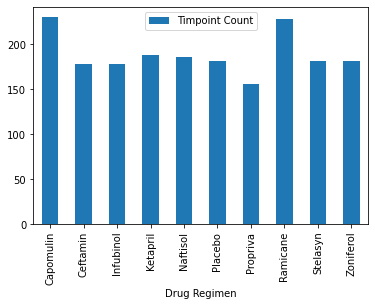

In [407]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x = drugs
yax = df.groupby('Drug Regimen').count()['Timepoint']
df1 = pd.DataFrame({'Drugs': x, 'Timpoint Count': yax})
ax = df1.plot.bar(rot=90)

Text(0.5, 1.0, 'Total Time Points per Drug Regimen')

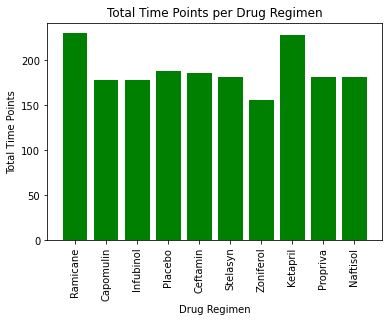

In [408]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugs, yax, color = 'g')
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Time Points")
plt.title("Total Time Points per Drug Regimen")

Male      958
Female    930
Name: Sex, dtype: int64


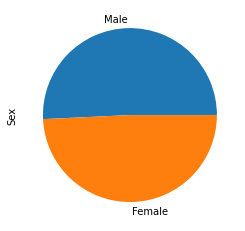

In [409]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderdist = df['Sex'].value_counts()
print(genderdist)
malecount = genderdist[0]
femalecount = genderdist[1]
dist_df = pd.DataFrame({'count': [malecount, femalecount]}, index = ['Male Count', 'Female Count']) 
plot = genderdist.plot.pie(y = 'count') 

([<matplotlib.patches.Wedge at 0x7fbe2c728e50>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Males'),
  Text(0.025622792083347525, -1.099701537930112, 'Females')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

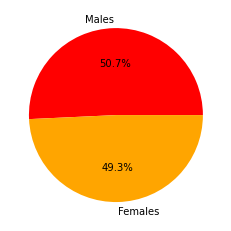

In [410]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Males','Females']
sizes = [int(malecount), int(femalecount)]
plt.pie(sizes, labels=labels, colors = ['red','orange'], autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [711]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

grouped = df1.drop_duplicates('Mouse ID', keep='last')
cap = grouped.loc[grouped['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ram = grouped.loc[grouped['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
inf = grouped.loc[grouped['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceft = grouped.loc[grouped['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']
d = {'Capomulin': cap, 'Ramicane': ram, 'Infubinol': inf, 'Ceftamin': ceft}
ser = pd.Series(data = d, index = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


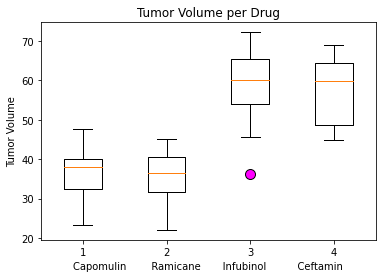

The following are the outliers in the boxplot:669    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [726]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume per Drug')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Capomulin        Ramicane       Infubinol          Ceftamin')
ax1.boxplot(ser, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'fuchsia'})
plt.show()
outliers = inf[(inf <= lower_bound) | (inf >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

In [727]:
# Only showing statistics for Infubinol as the box plot showed it's the only one with an outlier, replacing "inf" with cap, ram, ceft will give statistics for the rest of the drug regimens

quartiles = inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


## Line and Scatter Plots

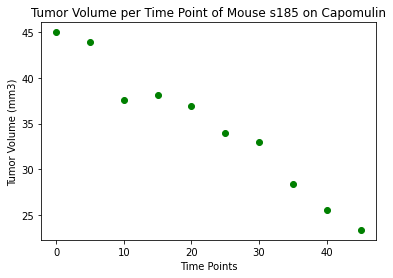

In [515]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df.loc[df['Drug Regimen'] == 'Capomulin']
df2 = df.loc[df['Mouse ID'] == 's185']
tumorvol = list(df2['Tumor Volume (mm3)'])
timepoint = list(df2['Timepoint'])
plt.title('Tumor Volume per Time Point of Mouse s185 on Capomulin')
plt.xlabel('Time Points')
plt.ylabel('Tumor Volume (mm3)')
plt.scatter(timepoint, tumorvol, color='green')

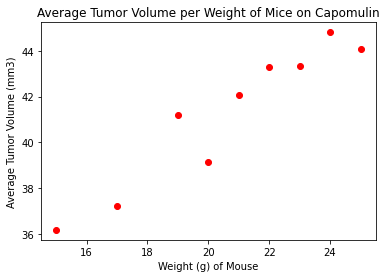

In [528]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df3 = df.groupby(['Drug Regimen','Weight (g)'])['Tumor Volume (mm3)'].mean()
new = pd.DataFrame(df3)
df4 = pd.DataFrame(new.groupby(['Drug Regimen']).get_group('Capomulin')).reset_index()
x = df4['Weight (g)'].tolist()
y = df4['Tumor Volume (mm3)'].tolist()
plt.title('Average Tumor Volume per Weight of Mice on Capomulin')
plt.xlabel('Weight (g) of Mouse')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x, y, color='red')

## Correlation and Regression

In [553]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x, y)
print(f'The correlation coeffienct for mouse weight and average tumor volume for the Capomulin regimen is: {round(correlation[0],2)}')

The correlation coeffienct for mouse weight and average tumor volume for the Capomulin regimen is: 0.95


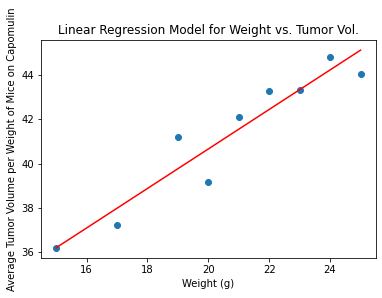

y = 0.89x + 22.76


In [569]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = np.array(x) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15,color="red",)
plt.title('Linear Regression Model for Weight vs. Tumor Vol.')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume per Weight of Mice on Capomulin')
plt.show()
print(line_eq)